In [121]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

In [122]:
path = 'train.csv'
data = pd.read_csv(path)

In [123]:
from pandas_visual_analysis import VisualAnalysis
import seaborn as sns
VisualAnalysis(data)

In [124]:
data

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1084.0,D-penicillamine,17664.0,F,N,N,N,N,0.5,273.0,3.65,23.0,648.0,52.70,59.0,316.0,10.0,2.0,C
1,1,790.0,D-penicillamine,23376.0,F,N,Y,N,N,8.4,NaN,3.15,161.0,1790.0,181.35,NaN,298.0,13.6,4.0,D
2,2,1367.0,NaN,13149.0,F,NaN,NaN,NaN,N,0.6,NaN,3.03,NaN,NaN,NaN,NaN,402.0,11.4,1.0,C
3,3,2721.0,Placebo,17809.0,F,N,Y,N,N,0.9,NaN,3.80,18.0,1868.0,97.65,NaN,327.0,9.5,2.0,C
4,4,989.0,NaN,12369.0,F,NaN,NaN,NaN,N,1.8,NaN,3.58,NaN,NaN,NaN,NaN,244.0,10.4,3.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2598.0,NaN,21915.0,F,NaN,NaN,NaN,N,0.6,NaN,3.36,NaN,NaN,NaN,NaN,319.0,10.6,3.0,C
14996,14996,2419.0,D-penicillamine,20354.0,F,N,Y,N,N,0.6,253.0,4.64,26.0,5430.2,67.08,83.0,336.0,9.9,2.0,C
14997,14997,2249.0,NaN,16071.0,F,NaN,NaN,NaN,N,0.6,NaN,3.84,NaN,NaN,NaN,NaN,226.0,9.5,2.0,C
14998,14998,207.0,D-penicillamine,17525.0,F,N,Y,Y,N,6.4,259.0,3.37,178.0,791.0,178.25,78.0,200.0,11.6,4.0,D


In [125]:
data.dtypes

id                 int64
N_Days           float64
Drug              object
Age              float64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

In [126]:
data.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,15000.000000,15000.000000,15000.000000,15000.000000,6591.000000,15000.000000,8301.000000,8390.000000,8388.000000,6542.000000,14465.000000,14972.000000,15000.000000
mean,7499.500000,1975.936133,19335.121000,1.856540,324.362464,3.529608,74.059511,1629.502491,105.941519,110.773311,254.624286,10.628560,3.020200
std,4330.271354,1329.160103,3770.307853,2.808997,173.485624,0.376463,75.157884,1783.319145,52.530975,49.619668,93.805348,0.735234,0.875505
min,0.000000,28.000000,124.000000,0.300000,120.000000,1.960000,4.000000,7.300000,6.300000,33.000000,0.400000,9.000000,1.000000
25%,3749.750000,1095.000000,16688.000000,0.600000,239.000000,3.290000,31.000000,714.000000,70.000000,80.000000,183.000000,10.100000,2.000000
50%,7499.500000,1786.000000,19544.000000,0.900000,279.000000,3.580000,52.000000,1071.000000,97.650000,99.000000,251.000000,10.600000,3.000000
75%,11249.250000,2644.000000,22546.000000,1.800000,360.000000,3.770000,84.000000,1664.000000,130.200000,133.000000,312.000000,11.000000,4.000000
max,14999.000000,25772.000000,129715.000000,28.000000,2870.000000,4.930000,1488.000000,17889.200000,1214.000000,598.000000,721.000000,18.000000,4.000000


In [127]:
classes = data['Status'].unique()
classes

array(['C', 'D', 'CL'], dtype=object)

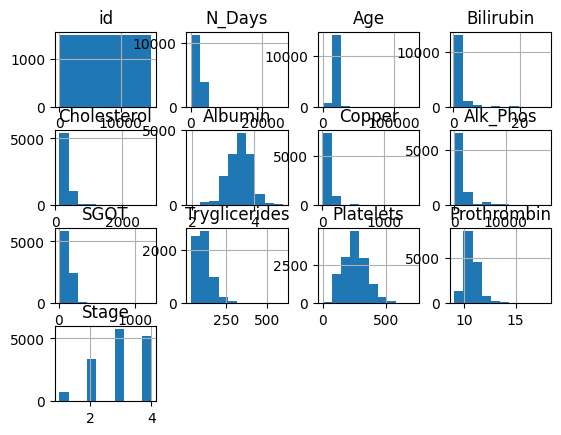

In [128]:
data.hist()
plt.show()

In [129]:
target_mapping = {'C': 0, 'CL': 1, 'D': 2}
data['Status'] = data['Status'].map(target_mapping)

In [130]:
(data.isna().sum()/len(data))*100

id                0.000000
N_Days            0.000000
Drug             44.053333
Age               0.000000
Sex               0.000000
Ascites          44.020000
Hepatomegaly     44.046667
Spiders          44.040000
Edema             0.000000
Bilirubin         0.000000
Cholesterol      56.060000
Albumin           0.000000
Copper           44.660000
Alk_Phos         44.066667
SGOT             44.080000
Tryglicerides    56.386667
Platelets         3.566667
Prothrombin       0.186667
Stage             0.000000
Status            0.000000
dtype: float64

In [131]:
X = data.drop(['Status'], axis=1)
y = data['Status']


In [132]:
X.drop("id",axis=1,inplace=True)
from sklearn.preprocessing import OneHotEncoder
categorical_columns = ['Sex', 'Ascites','Hepatomegaly','Spiders','Edema','Stage','Drug']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(X[categorical_columns])
encoded = encoder.transform(X[categorical_columns])
encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_columns))
X= X.drop(columns=categorical_columns).reset_index(drop=True)
X = pd.concat([X, encoded], axis=1)


X.drop('Drug_N',axis=1,inplace = True)




In [133]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [134]:
X

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Edema_N,Edema_S,Edema_Y,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0,Drug_D-penicillamine,Drug_Placebo,Drug_nan
0,1084.0,17664.0,0.5,273.0,3.65,23.0,648.0,52.70,59.0,316.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,790.0,23376.0,8.4,310.6,3.15,161.0,1790.0,181.35,78.6,298.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1367.0,13149.0,0.6,315.6,3.03,92.6,1877.2,136.27,115.2,402.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2721.0,17809.0,0.9,371.4,3.80,18.0,1868.0,97.65,125.4,327.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,989.0,12369.0,1.8,438.4,3.58,74.8,1723.0,136.75,96.0,244.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2598.0,21915.0,0.6,277.2,3.36,48.4,1067.6,123.84,96.4,319.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
14996,2419.0,20354.0,0.6,253.0,4.64,26.0,5430.2,67.08,83.0,336.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
14997,2249.0,16071.0,0.6,316.4,3.84,37.6,1508.4,102.37,81.8,226.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
14998,207.0,17525.0,6.4,259.0,3.37,178.0,791.0,178.25,78.0,200.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [135]:
column_names = X.columns.tolist()

print("Column names:", column_names)

Column names: ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Sex_F', 'Sex_M', 'Ascites_N', 'Ascites_Y', 'Ascites_nan', 'Hepatomegaly_N', 'Hepatomegaly_Y', 'Hepatomegaly_nan', 'Spiders_N', 'Spiders_Y', 'Spiders_nan', 'Edema_N', 'Edema_S', 'Edema_Y', 'Stage_1.0', 'Stage_2.0', 'Stage_3.0', 'Stage_4.0', 'Drug_D-penicillamine', 'Drug_Placebo', 'Drug_nan']


In [137]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [139]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline


In [140]:
lgbm_clf = LGBMClassifier(random_state=42, device = 'gpu')
cb_clf = CatBoostClassifier(random_state=42, verbose=0, task_type="GPU")
rf_clf = RandomForestClassifier(random_state=42)

In [141]:
lgbm_pipe = make_pipeline(RobustScaler(),lgbm_clf)
cb_pipe = make_pipeline(RobustScaler(),cb_clf)
rf_pipe = make_pipeline(RobustScaler(),rf_clf)

In [142]:
param_grid_lgbm = {
    'lgbmclassifier__num_leaves': [31, 50, 70],
    'lgbmclassifier__max_depth': [-1, 10, 20],
    'lgbmclassifier__learning_rate': [0.01, 0.1, 0.2],
    'lgbmclassifier__n_estimators': [100, 200, 500],
    'lgbmclassifier__min_child_samples': [20, 30, 40]
}

param_grid_cb = {
    'catboostclassifier__depth': [6, 8, 10],
    'catboostclassifier__learning_rate': [0.01, 0.1, 0.2],
    'catboostclassifier__iterations': [100, 200, 500]
}

param_grid_rf = {
    'randomforestclassifier__n_estimators': [100, 200, 500],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}


In [143]:
grid_search_lgbm = GridSearchCV(estimator=lgbm_pipe,param_grid=param_grid_lgbm,cv=3,scoring='accuracy',verbose=1,n_jobs = - 1)
grid_search_cb = GridSearchCV(estimator=cb_pipe, param_grid=param_grid_cb, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_rf = GridSearchCV(estimator=rf_pipe, param_grid=param_grid_rf, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

: 

In [144]:
grid_search_lgbm.fit(X_scaled,y)
grid_search_cb.fit(X_scaled, y)
grid_search_rf.fit(X_scaled, y)


Fitting 3 folds for each of 243 candidates, totalling 729 fits


In [ ]:
best_lgbm = grid_search_lgbm.best_estimator_
best_cb = grid_search_cb.best_estimator_
best_rf = grid_search_rf.best_estimator_

In [ ]:
print("Best LGBM Parameters:", grid_search_lgbm.best_params_)
print("Best LGBM Cross-Validation Accuracy:", grid_search_lgbm.best_score_)
print("Best CatBoost Parameters:", grid_search_cb.best_params_)
print("Best CatBoost Cross-Validation Accuracy:", grid_search_cb.best_score_)
print("Best RandomForest Parameters:", grid_search_rf.best_params_)
print("Best RandomForest Cross-Validation Accuracy:", grid_search_rf.best_score_)

In [ ]:
estimators = [
    ('LGBM', best_lgbm),
    ('CB', best_cb),
    ('RF', best_rf)
]

meta_clf = LogisticRegression()

In [ ]:
SC = StackingClassifier(estimators=estimators, final_estimator=meta_clf, cv=3)

SC.fit(X_scaled, y)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7087
[LightGBM] [Info] Number of data points in the train set: 30429, number of used features: 32
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003535 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7027
[LightGBM] [Info] Number of data points in the train set: 20286, number of used features: 32
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001438 sec

In [ ]:


stacking_predictions = SC.predict(X_scaled)
stacking_accuracy = accuracy_score(y, stacking_predictions)
print("Stacking Classifier Accuracy:", stacking_accuracy)

stacking_scores = cross_val_score(SC, X_scaled, y, cv=3, scoring='accuracy')
print("Stacking Classifier Cross-Validation Accuracy Scores:", stacking_scores)
print("Mean Stacking Classifier Cross-Validation Accuracy:", stacking_scores.mean())

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 15000, number of used features: 32
[LightGBM] [Info] Start training from score -0.391266
[LightGBM] [Info] Start training from score -3.740875
[LightGBM] [Info] Start training from score -1.203751
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

StackingClassifier(cv=3,
                   estimators=[('LGBM',
                                Pipeline(steps=[('robustscaler',
                                                 RobustScaler()),
                                                ('lgbmclassifier',
                                                 LGBMClassifier(max_depth=20,
                                                                n_estimators=500,
                                                                num_leaves=70,
                                                                random_state=42))])),
                               ('CB',
                                Pipeline(steps=[('robustscaler',
                                                 RobustScaler()),
                                                ('catboostclassifier',
                                                 <catboost.core.CatBoostClassifier object at 0x00000270D9BC3F50>)])),
                               ('RF',
                                Pipeline(steps=[('robustscaler',
                                                 RobustScaler()),
                                                ('randomforestclassifier',
                                                 RandomForestClassifier(n_estimators=500,
                                                                        random_state=42))]))],
                   final_estimator=LogisticRegression())

In [ ]:
predictions = SC.predict(X_scaled)
probas = SC.predict_proba(X_scaled)
probas_df = pd.DataFrame(probas, columns=[f'prob_class_{i}' for i in range(probas.shape[1])])

In [ ]:
accuracy = accuracy_score(y, predictions)

print("Classifier Accuracy:", accuracy)


Classifier Accuracy: 0.9998666666666667


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10143
           1       1.00      1.00      1.00       356
           2       1.00      1.00      1.00      4501

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



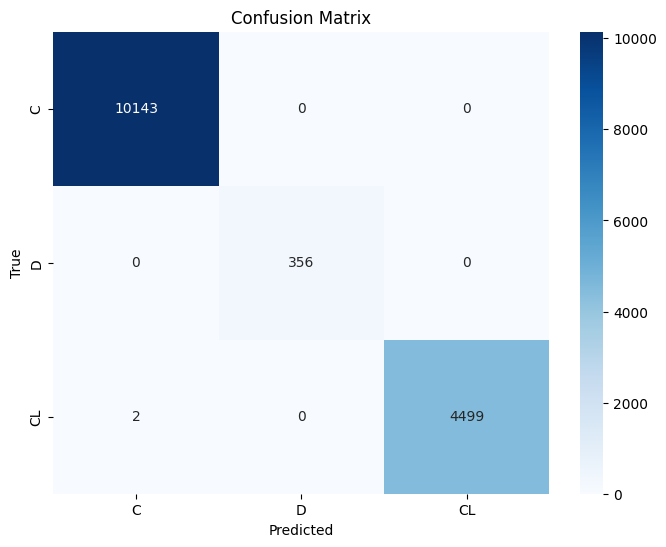

In [ ]:
print(classification_report(y, predictions))
cm_rf = confusion_matrix(y, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
probas_df

,prob_class_0,prob_class_1,prob_class_2
0,0.953376,0.008810,0.037814
1,0.031488,0.008698,0.959814
2,0.914743,0.015179,0.070078
3,0.947161,0.010624,0.042216
4,0.943539,0.012839,0.043622
...,...,...,...
14995,0.954890,0.008630,0.036480
14996,0.948812,0.009673,0.041515
14997,0.948805,0.009672,0.041523
14998,0.029540,0.007612,0.962848


In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y,probas)
loss

0.07466544813733111

In [ ]:
test_data = pd.read_csv('test.csv')
test_data

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,15000,2157.0,Placebo,21281.0,F,N,N,N,N,0.7,298.0,3.64,27.0,637.0,106.95,68.0,201.0,10.6,1.0
1,15001,348.0,D-penicillamine,19817.0,F,N,Y,Y,N,2.3,175.0,3.06,225.0,944.0,120.90,75.0,102.0,12.3,3.0
2,15002,131.0,D-penicillamine,16154.0,F,N,Y,Y,N,6.5,950.0,3.40,88.0,2374.0,193.00,133.0,354.0,11.8,4.0
3,15003,1141.0,NaN,21532.0,F,NaN,NaN,NaN,N,0.6,NaN,4.19,NaN,NaN,NaN,NaN,181.0,10.9,2.0
4,15004,1260.0,NaN,23011.0,F,NaN,NaN,NaN,N,0.9,NaN,3.81,NaN,NaN,NaN,NaN,371.0,10.5,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,3992.0,D-penicillamine,20708.0,F,N,N,N,N,0.9,303.0,3.85,29.0,2065.0,232.50,85.0,426.0,10.7,1.0
9996,24996,3231.0,NaN,19358.0,F,NaN,NaN,NaN,N,0.6,NaN,3.01,NaN,NaN,NaN,NaN,150.0,10.6,3.0
9997,24997,1119.0,NaN,18628.0,F,NaN,NaN,NaN,N,0.9,NaN,3.01,NaN,NaN,NaN,NaN,340.0,10.0,3.0
9998,24998,3244.0,D-penicillamine,10795.0,F,N,Y,N,N,3.3,236.0,3.33,112.0,794.0,113.15,114.0,217.0,12.3,3.0


In [ ]:
X=test_data

In [ ]:
X.drop("id",axis=1,inplace=True)
from sklearn.preprocessing import OneHotEncoder
categorical_columns = ['Sex', 'Ascites','Hepatomegaly','Spiders','Edema','Stage','Drug']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(X[categorical_columns])
encoded = encoder.transform(X[categorical_columns])
encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_columns))
X= X.drop(columns=categorical_columns).reset_index(drop=True)
X = pd.concat([X, encoded], axis=1)

X

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Edema_N,Edema_S,Edema_Y,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0,Drug_D-penicillamine,Drug_Placebo,Drug_nan
0,2157.0,21281.0,0.7,298.0,3.64,27.0,637.0,106.95,68.0,201.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,348.0,19817.0,2.3,175.0,3.06,225.0,944.0,120.90,75.0,102.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,131.0,16154.0,6.5,950.0,3.40,88.0,2374.0,193.00,133.0,354.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1141.0,21532.0,0.6,NaN,4.19,NaN,NaN,NaN,NaN,181.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1260.0,23011.0,0.9,NaN,3.81,NaN,NaN,NaN,NaN,371.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3992.0,20708.0,0.9,303.0,3.85,29.0,2065.0,232.50,85.0,426.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9996,3231.0,19358.0,0.6,NaN,3.01,NaN,NaN,NaN,NaN,150.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9997,1119.0,18628.0,0.9,NaN,3.01,NaN,NaN,NaN,NaN,340.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9998,3244.0,10795.0,3.3,236.0,3.33,112.0,794.0,113.15,114.0,217.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.impute import KNNImputer


# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)  # Adjust n_neighbors as needed

# Fit and transform the data
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [ ]:
X.drop(['Spiders_10.0', 'Hepatomegaly_10.0', ],axis=1,inplace = True)


In [ ]:
column_names = X.columns.tolist()

print("Column names:", column_names)

Column names: ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Sex_F', 'Sex_M', 'Ascites_N', 'Ascites_Y', 'Ascites_nan', 'Hepatomegaly_N', 'Hepatomegaly_Y', 'Hepatomegaly_nan', 'Spiders_N', 'Spiders_Y', 'Spiders_nan', 'Edema_N', 'Edema_S', 'Edema_Y', 'Stage_1.0', 'Stage_2.0', 'Stage_3.0', 'Stage_4.0', 'Drug_D-penicillamine', 'Drug_Placebo', 'Drug_nan']


In [ ]:
scaler = RobustScaler()
X_scaled_test = scaler.fit_transform(X)

In [ ]:
predictions_test = SC.predict(X_scaled_test)
probas_test = SC.predict_proba(X_scaled_test)
probas_df = pd.DataFrame(probas_test, columns=[f'prob_class_{i}' for i in range(probas.shape[1])])

In [ ]:
submission_df = pd.DataFrame(probas_test, columns=['Status_C', 'Status_CL', 'Status_D'])
submission_df

,Status_C,Status_CL,Status_D
0,0.952636,0.009232,0.038132
1,0.041496,0.010605,0.947899
2,0.033330,0.009090,0.957580
3,0.934584,0.011604,0.053811
4,0.734246,0.025301,0.240453
...,...,...,...
9995,0.916919,0.015255,0.067825
9996,0.917701,0.012757,0.069542
9997,0.932596,0.012989,0.054416
9998,0.221236,0.035644,0.743121


In [ ]:
test_df = pd.read_csv('test.csv')

In [ ]:
test_ids = test_df['id']


In [ ]:
submission_df.insert(0, 'id', test_ids) 

In [ ]:
submission_df

,id,Status_C,Status_CL,Status_D
0,15000,0.952636,0.009232,0.038132
1,15001,0.041496,0.010605,0.947899
2,15002,0.033330,0.009090,0.957580
3,15003,0.934584,0.011604,0.053811
4,15004,0.734246,0.025301,0.240453
...,...,...,...,...
9995,24995,0.916919,0.015255,0.067825
9996,24996,0.917701,0.012757,0.069542
9997,24997,0.932596,0.012989,0.054416
9998,24998,0.221236,0.035644,0.743121


In [ ]:
submission_df.to_csv('submission.csv', index=False)
